# Task 1 Data Analysis Pipeline
This part calls the data pipeline function 'load_and_process' to prepare the dataset of Kickstarter projects for analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import os
import datetime

# For how to import the scripts folder so that it can be used:
# https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.append('../scripts')

import project_functions
# relative import did not work for some reason
#from .. import project_functions

pathToData = '../../data/raw/ks-projects-201801.csv'

df = project_functions.load_and_process(pathToData)

print(df[['main_category','stateInt','durationInt']].head(10))

  main_category  stateInt  durationInt
0    Publishing         0           58
1  Film & Video         0           59
2  Film & Video         0           44
3         Music         0           29
4  Film & Video         2           55
5          Food         1           34
6          Food         1           19
7          Food         0           44
8        Design         2           34
9  Film & Video         2           29


---
# Explanatory Data Analysis

The info function gives information on all the columns and there associated types. The result shows that the 'load_and_process' function of the data pipeline has worked correctly as the new **'stateInt'** (int64), **'duration'** (timedelta64)\[ns\], and **'durationInt'** (int 64) columns have been created with the correct types.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   Name              40000 non-null  object         
 1   category          40000 non-null  object         
 2   main_category     40000 non-null  object         
 3   currency          40000 non-null  object         
 4   deadline          40000 non-null  object         
 5   launched          40000 non-null  object         
 6   pledged           40000 non-null  float64        
 7   state             40000 non-null  object         
 8   backers           40000 non-null  int64          
 9   country           40000 non-null  object         
 10  usd_pledged_real  40000 non-null  float64        
 11  usd_goal_real     40000 non-null  float64        
 12  stateInt          40000 non-null  int64          
 13  duration          40000 non-null  timedelta64[ns]
 14  percen

This function shows the number of unique values for each column.

In [3]:
print(df.nunique(axis=0))

Name                199053
category               159
main_category           15
currency                14
deadline              3129
launched            199837
pledged              39458
state                    6
backers               2991
country                 23
usd_pledged_real     63981
usd_goal_real        32576
stateInt                 6
duration            157789
percentFunded        96486
durationInt             96
dtype: int64


In [5]:
print(df.describe())

                 ID       pledged     backers  usd_pledged_real  \
count  2.000000e+01     20.000000   20.000000         20.000000   
mean   8.650327e+08   9159.278500   68.450000      10543.395000   
std    3.297248e+08  23187.913671  170.990143      28700.604989   
min    1.000042e+08      0.000000    0.000000          0.000000   
25%    1.000004e+09    165.250000    2.500000        165.250000   
50%    1.000027e+09    726.500000   15.500000        726.500000   
75%    1.000059e+09   3375.892500   40.750000       3375.892500   
max    1.000072e+09  94175.000000  761.000000     121857.330000   

       usd_goal_real   stateInt                    duration  percentFunded  
count      20.000000  20.000000                          20      20.000000  
mean    30283.003500   0.550000     35 days 01:23:08.950000     122.916023  
std     50387.371853   0.759155  12 days 07:19:59.766234008     416.427506  
min       250.000000   0.000000            14 days 09:48:28       0.000000  
25%      24

This plot shows the distribution of Kickstarter projects based on the duration of the project. Interestingly, this shows that 1 month long projects are the majority of projects composing about 47% of all projects. 2 month long and 1.5 month long projects are the next most common.

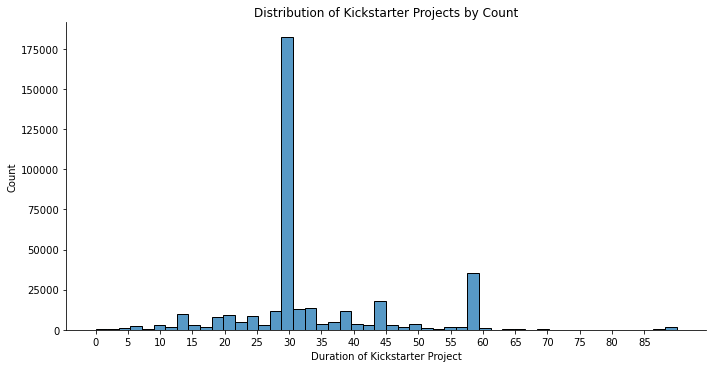

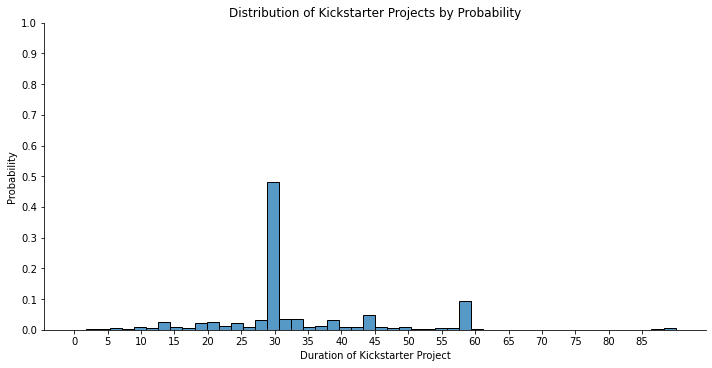

In [5]:

axes = sns.displot(data=df[df['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50).set(title='Distribution of Kickstarter Projects by Count')
#axes = sns.displot(data=df, x='durationInt', aspect=2.0)
axes.set_axis_labels('Duration of Kickstarter Project', 'Count')
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
axes.set(xticks=np.arange(0, 90, 5))


# Learned how to use 'stat' parameter to get bins by probability and not count from user miro from here:
# https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count
axes = sns.displot(data=df[df['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50, stat='probability').set(title='Distribution of Kickstarter Projects by Probability')
axes.set_axis_labels('Duration of Kickstarter Project', 'Probability')
axes.set(xticks=np.arange(0, 90, 5), yticks=np.arange(0,1.1,0.1))

Here is another interesting plot which shows the distribution of the different possible states of a project. Since my research question is focused on how the duration of a project affects it success, I am going to focus on projects which have the states of 'failed/canceled' or 'successful'. The other states do not provide information about the success so they will be filter out.

<AxesSubplot:xlabel='state', ylabel='count'>

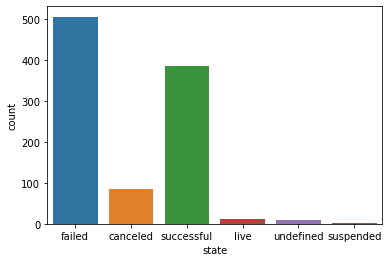

In [7]:
sns.countplot(x='state', data=df)

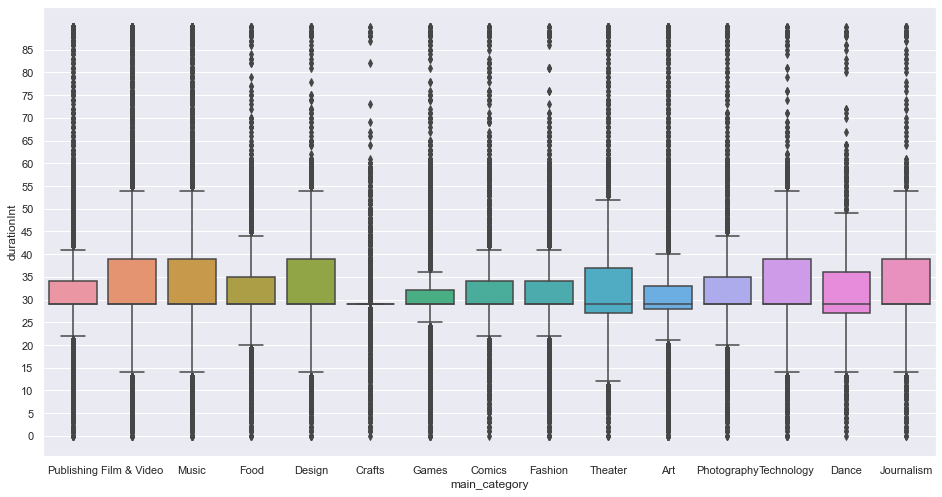

In [7]:
# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})
box1 = sns.boxplot(data=df[df['durationInt'].between(0, 90)], y='durationInt', x='main_category')
box1.set(yticks=np.arange(0,90,5))
print()

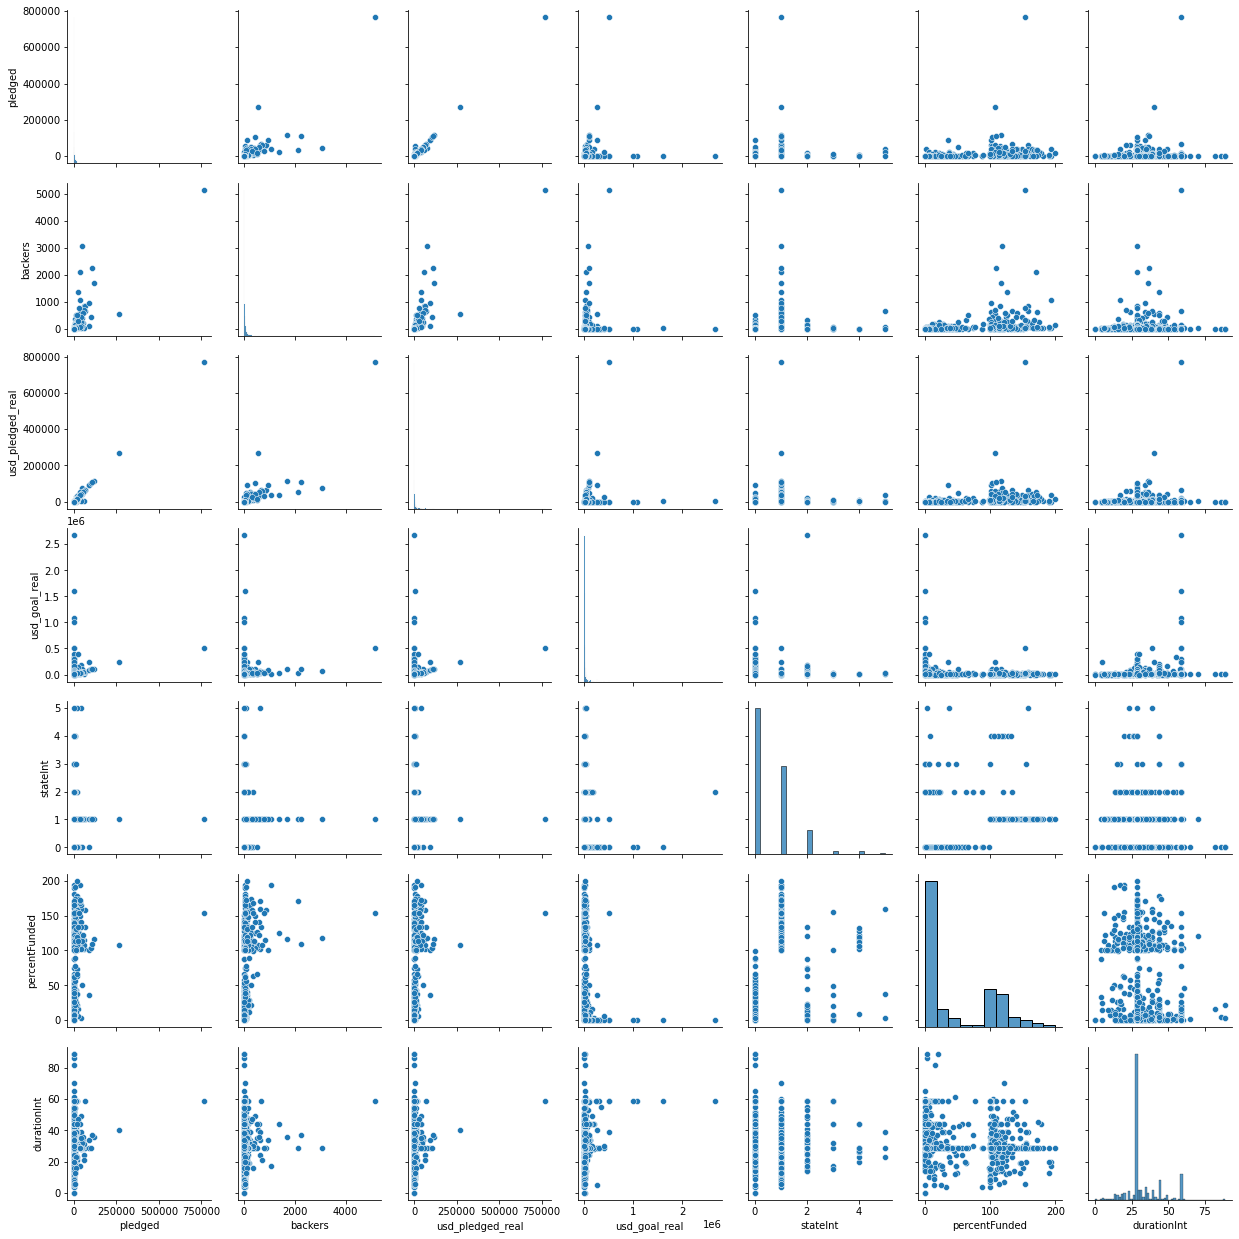

In [6]:
sns.pairplot(df2)

# Task 4 | Analysis of Data to Answer Research Question

Jacob's research question: Does the duration of a Kickstarter project affect its success?

---

One way to test this research question is to create a correlation matrix where the correlation between each pair of numeric variables in the dataset can be seen.

<AxesSubplot:>

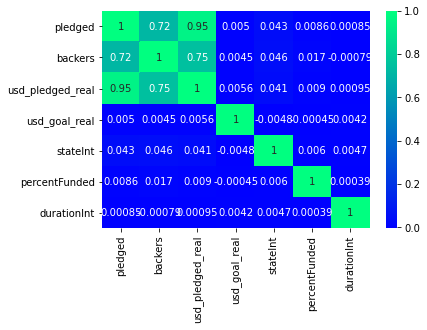

In [3]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='winter')

In this plot, I am interested in the correlation between how funded the project was (percentFunded) and the duration of the project (durationInt). Here it shows a correlation of -0.024 which is a strong first indicator that the duration of the Kickstarter project may not affect its success.

Here is another plot which helps show visually that duration of the project doesn't seem to be strongly correlated with the success of the project.

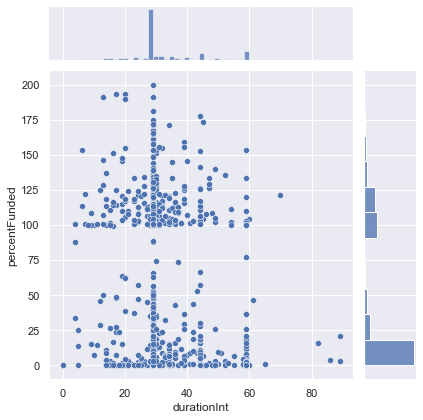

In [10]:
df2 = df[df['percentFunded'].between(0, 200)]
sns.jointplot(data=df2, x='durationInt', y='percentFunded')

<AxesSubplot:title={'center':'Probability of Success vs. Project Funding Time Length'}, xlabel='Duration of Project', ylabel='Probability of Success'>

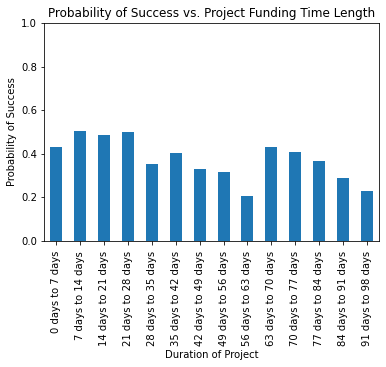

In [2]:
# Plot probability of success vs. project funding time length


# only keep projects with state of: failed, successful, or canceled
df2 = df
df2 = df2[(df2['stateInt'] == 0) | (df2['stateInt'] == 1) | (df2['stateInt'] == 2)]

# change any 'canceled' projects to be considered as 'failed' projects
df2 = df2.assign(stateInt=lambda x: np.where(x['stateInt'] != 2, x['stateInt'], 0))

# create a list of timedelta objects to represent the different time period groupings (0-1 week, 1-2 weeks, ....)
timeSections = pd.timedelta_range(start='0 days', end='100 days', freq='7D')

# create a (categorical) Series of time interval objects from the timeSections
# timeIntervals has type pandas.core.series.Series
# more on categorical series: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
# timeIntervals individual elements (time intervals) are of type: pandas._libs.interval.Interval
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Interval.html
timeIntervals = pd.cut(df2.duration, timeSections)

df3 = df2
# groupby the timeintervals and calculate the mean
df2 = (df2.groupby(timeIntervals).mean())

# only keep the stateInt column
df2 = df2[['stateInt']]

#print('before')
#print(df2.head(20))

formattedTimeIntervals = []

for interval in df2.index:
    formattedTimeIntervals.append(str(interval).replace('(', '').replace(']', '').replace('00:00:00', '').replace(',', 'to'))
    
#print(formattedTimeIntervals[0])

df2['formattedTimeIntervals'] = formattedTimeIntervals

#print(df2)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot
df2.plot(kind='bar', x='formattedTimeIntervals', y='stateInt', ylabel='Probability of Success', xlabel='Duration of Project', ylim=(0,1), legend=False, title='Probability of Success vs. Project Funding Time Length')


Name                644
category             50
main_category        15
currency              1
deadline            361
launched            644
pledged             476
state                 3
backers             149
country               1
usd_pledged_real    476
usd_goal_real       134
stateInt              2
duration            644
percentFunded       514
durationInt           7
dtype: int64
mean: 0.42857142857142855


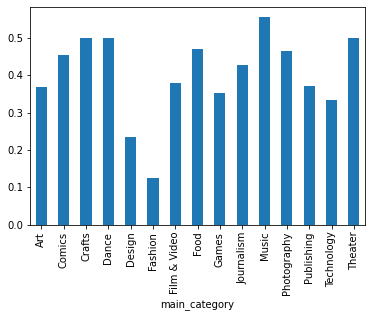

In [9]:


dfNew = project_functions.getProjectsWithDurationInTimeRange(df, 63, 70)
dfNew = project_functions.getProjectsAsFailedOrSuccessful(dfNew)
print(dfNew.nunique(axis=0))
print(f"mean: {dfNew['stateInt'].mean()}")

dfTest = dfNew.groupby('main_category')['stateInt'].mean().plot(kind='bar')



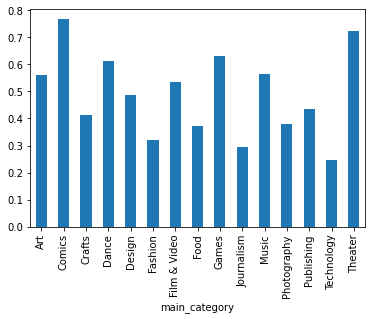

In [10]:

dfNew2 = project_functions.getProjectsWithDurationInTimeRange(df, 7, 14)
dfNew2 = project_functions.getProjectsAsFailedOrSuccessful(dfNew2)
dfTest2 = dfNew2.groupby('main_category')['stateInt'].mean().plot(kind='bar')

Index(['stateInt', 'duration2', 'category2'], dtype='object')


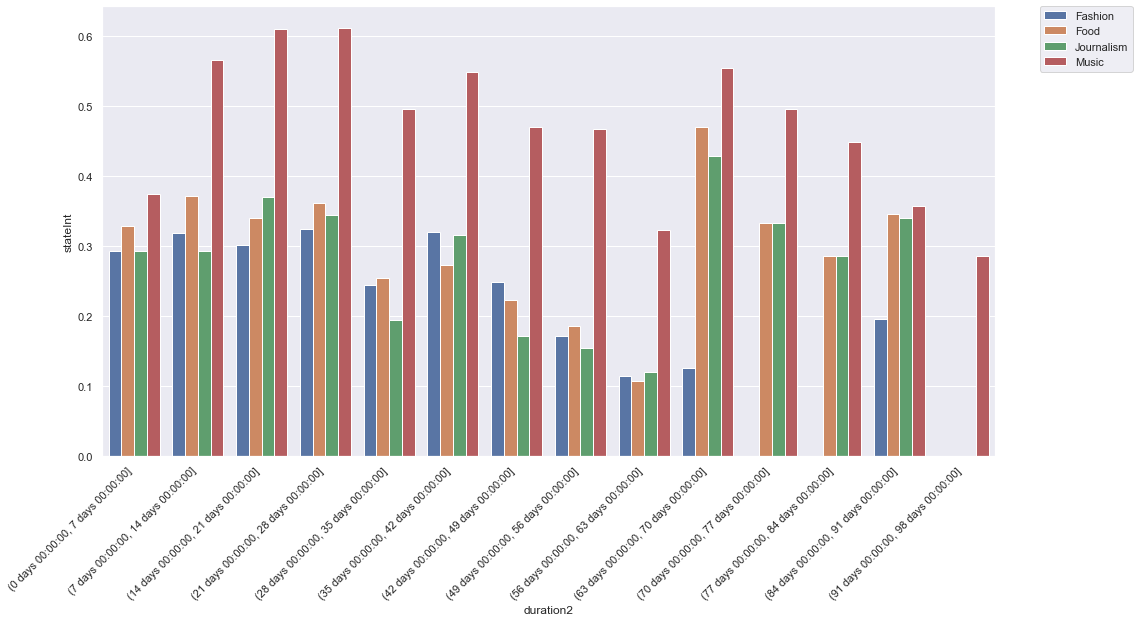

In [6]:
import matplotlib.pyplot as plt


# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})

#print(df3.head(5))
df4 = df3.groupby([timeIntervals,'main_category']).mean()
df4 = df4[['stateInt']]
#print(df4.index.get_level_values(0))
df4['duration2'] = df4.index.get_level_values(0)
df4['category2'] = df4.index.get_level_values(1)
#print(df4.head(60))

df4 = df4[(df4['category2'] == 'Fashion') | (df4['category2'] == 'Music') | (df4['category2'] == 'Food') | (df4['category2'] == 'Journalism')]

print(df4.columns)
a = sns.barplot(data=df4, x='duration2', y='stateInt', hue='category2')
# for help rotating x_tick labels:
# https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')

#plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

